# Data wrangling WeRateDogs

# Content :
### * Gathering data

###  * Assessing data
            * Quality
            * Tidiness
### * Cleaning data

### * Storing
### * Analyzing

#### PART 1: imports and Constants

In [131]:
import numpy as np
import pandas as pd
import requests
import os
import json
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [132]:
#Constant 

#PATH= 'C:/Users/kholoud/Desktop/Pro2/'

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'




# Gathering data:

 #### We Have Three Files :
    
    image-predictions-3 -->TSV file
    twitter-archive-enhanced-2 -->XLS Sheet ,csv
    tweet-json copy --> json file


##### PART 2 : GET Twitter API

In [133]:
'''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

'''

'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_i

In [134]:
url =  "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

image_predictions_DataFrame = pd.read_csv('image-predictions.tsv', sep='\t' )

In [135]:
tweet_data = []

#with open(PATH + 'tweet-json.txt', 'r') as json_line:
with open( 'tweet-json.txt', 'r') as json_line:

    line = json_line.readline()
    while line:
        data_line= json.loads(line)

        id = data_line['id']
        retweet_count = data_line['retweet_count']
        favorite_count = data_line['favorite_count']
        
        json_data = {'tweet_id': id, 
                     'retweet_count': retweet_count, 
                     'favorite_count': favorite_count
                    }
        tweet_data.append(json_data)

        line = json_line.readline()

DataFrame_ALL_Data = pd.DataFrame(tweet_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])


In [136]:
DataFrame_ALL_Data.to_csv( 'tweet_json.csv', index = False)


In [137]:
# frist file
twitter_archive_DataFrame = pd.read_csv('twitter-archive-enhanced-2.csv')


# Second  file
#image_predictions_DataFrame = pd.read_csv('image-predictions-3.tsv',sep="\t")

# Thred file 
#tweet_json_DataFrame = pd.read_csv(PATH +'tweet_json.csv')
tweet_json_DataFrame = pd.read_csv('tweet_json.csv')

In [138]:
twitter_archive_DataFrame.sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


***Assess Data***


#### info For Each DataFrame

In [139]:
print('twitter_archive_DataFrame INFO :')
twitter_archive_DataFrame.info()


twitter_archive_DataFrame INFO :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object

In [140]:

print('image_predictions_DataFrame INFO')
image_predictions_DataFrame.info()


image_predictions_DataFrame INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [141]:

print('tweet_json_DataFrame INFO')
tweet_json_DataFrame.info()

tweet_json_DataFrame INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Describe for each DataFrame

In [142]:
print('twitter_archive_DataFrame Describe :')
twitter_archive_DataFrame.describe()


twitter_archive_DataFrame Describe :


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [143]:
print('image_predictions_DataFrame Describe :')
image_predictions_DataFrame.describe()


image_predictions_DataFrame Describe :


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [144]:
print('tweet_json_DataFrame Describe :')
tweet_json_DataFrame.describe()

tweet_json_DataFrame Describe :


,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Head and Tails for Each DataFrame 

In [145]:
print('twitter_archive_DataFrame Head :')
twitter_archive_DataFrame.head()


twitter_archive_DataFrame Head :


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [146]:
print('twitter_archive_DataFrame Tail :')
twitter_archive_DataFrame.tail()


twitter_archive_DataFrame Tail :


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [147]:
print('twitter_archive_DataFrame Head :')
image_predictions_DataFrame.head()


twitter_archive_DataFrame Head :


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [148]:
print('image_predictions_DataFrame tail :')
image_predictions_DataFrame.tail()


image_predictions_DataFrame tail :


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [149]:
print('tweet_json_DataFrame head  :')
tweet_json_DataFrame.head()

tweet_json_DataFrame head  :


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [150]:
print('tweet_json_DataFrame tail :')
tweet_json_DataFrame.tail()

tweet_json_DataFrame tail :


,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


#### Value Counts For Each DataFrame

In [151]:
twitter_archive_DataFrame.name.value_counts()


None         745
a             55
Charlie       12
Oliver        11
Lucy          11
            ... 
Grizzwald      1
Jiminus        1
Genevieve      1
Willy          1
Clifford       1
Name: name, Length: 957, dtype: int64

In [152]:
twitter_archive_DataFrame['tweet_id'].isnull().values.any()




False

#### Quality :
in DataFrame 1 --->(twitter_archive_DataFrame):

      the tweet_ID is not the right data type and value
      
      in_reply_to_status_id and in_reply_to_user_id has many nan and error in type value 
      
      timestamp is string and should be datetime

      we need  original ratings (no retweets)
      
      name  do not contain a valid name
      
      ratings without images
      
      we need to make all name Strat in Capital chart 
      
      some ratings are wrong 0/10   13/10
      
      null values  represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.
   
in DataFrame 2 --->(image_predictions_DataFrame):
      
      jpg_url contains two different path patterns to jpg files
      
      Drop  jpg_url duplicated

      some predictions are not dogs
      
      
      
#### Tidiness:

In twitter_archive_DataFrame   :


       'retweeted_status_id' 
       'retweeted_status_user_id' 
       'retweeted_status_timestamp' are not useful 
       
       
       doggo', 'floofer', 'pupper','puppo' but in  one column ---- > type
       
       
       we can marge btween tweet_json_DataFrame and twitter_archive_DataFrame and image_predictions_DataFrame_clean
       
       
       rating_numerator and denominator should be ---> rating.
       
       take just rate has image
       
       
       
       
       


      

# COPY FOR EACH DATAFRAME

In [153]:
twitter_archive_DataFrame_clean =twitter_archive_DataFrame.copy()

image_predictions_DataFrame_clean =image_predictions_DataFrame.copy()

tweet_json_DataFrame_clean =tweet_json_DataFrame.copy()


# clean Data

##### Define

### PART 1 :: marge three Dataframe

#### code

In [154]:

MetaData = [twitter_archive_DataFrame_clean, image_predictions_DataFrame_clean, tweet_json_DataFrame_clean]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), MetaData)


#### test

In [155]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132


In [156]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

#### Define

### PART 2::
        Delete 4 Columns  'doggo','floofer','pupper','puppo' and Relace it with one column

In [157]:
twitter.doggo.value_counts()


None     1993
doggo      80
Name: doggo, dtype: int64

In [158]:
twitter.floofer.value_counts()


None       2065
floofer       8
Name: floofer, dtype: int64

In [159]:
twitter.puppo.value_counts()


None     2049
puppo      24
Name: puppo, dtype: int64

In [160]:
twitter.pupper.value_counts()


None      1852
pupper     221
Name: pupper, dtype: int64

#### code

In [161]:
twitter.doggo=twitter.doggo.replace('None','')
twitter.floofer=twitter.floofer.replace('None','')
twitter.pupper=twitter.pupper.replace('None','')
twitter.puppo=twitter.puppo.replace('None','')

In [162]:
twitter.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1753
1,,,,puppo,23
2,,,pupper,,210
3,,floofer,,,7
4,doggo,,,,67
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [197]:
twitter['stage'] = twitter.doggo + twitter.floofer + twitter.pupper + twitter.puppo
twitter.loc[twitter.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter.loc[twitter.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter.loc[twitter.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#### test 

In [198]:
twitter.stage.value_counts()

                  1688
pupper             203
doggo               63
puppo               22
doggo, pupper        9
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [166]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

#### Define

### PART 3::
Remove retweets 
when Reomove retweets the  [retweeted_status_id ,retweeted_status_user_id , retweeted_status_timestamp ]

#### code

In [167]:
twitter = twitter[np.isnan(twitter.retweeted_status_id)]

twitter = twitter.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

#### test

In [168]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111,
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311,
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,...,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128,
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132,


In [169]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1

#### define 

### PART 4::
Error in Datatype WE Handel it 
        

#### code

In [170]:
twitter['tweet_id'] = twitter['tweet_id'].astype(str)
twitter.timestamp=pd.to_datetime(twitter.timestamp)
twitter.in_reply_to_user_id=twitter.in_reply_to_user_id.astype(str)
twitter.in_reply_to_status_id=twitter.in_reply_to_status_id.astype(str)


#### test

In [171]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111,
2069,666044226329800704,nan,nan,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311,
2070,666033412701032449,nan,nan,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,...,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128,
2071,666029285002620928,nan,nan,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132,


#### define

there are UperCase And lower case Names we need to handel that 
through know what is names

#### code

In [172]:
num = twitter['name'].value_counts()

num

None        546
a            55
Charlie      11
Lucy         10
Cooper       10
           ... 
Jareld        1
Cheryl        1
actually      1
Tebow         1
Clifford      1
Name: name, Length: 936, dtype: int64

In [173]:
twitter['name'].replace('None',  np.nan, inplace = True)



#### test

In [174]:
twitter['name'].value_counts()


a           55
Charlie     11
Lucy        10
Oliver      10
Cooper      10
            ..
Jareld       1
Cheryl       1
actually     1
Tebow        1
Clifford     1
Name: name, Length: 935, dtype: int64

## Analyze and Visualize Data

# part 5 :: Rating 
some Rating Contain 13/10 and some 0 /10 and some Rating Are fracrtion
we can srandrlize it in one columns

In [175]:
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']


In [176]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,...,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111,,0.5
2069,666044226329800704,nan,nan,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311,,0.6
2070,666033412701032449,nan,nan,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,...,malinois,0.138584,True,bloodhound,0.116197,True,47,128,,0.9
2071,666029285002620928,nan,nan,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132,,0.7


# Storing 

In [177]:
twitter.to_csv('twitter_archive_master.csv')


# Analyzing

### Type for Dogs Ratings type 

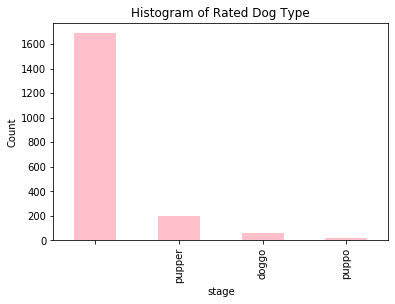

In [210]:
Type = twitter.groupby('stage').filter(lambda x: len(x) >=10)

Type['stage'].value_counts().plot(kind = 'bar' ,color = 'pink')
plt.xlabel('stage')
plt.ylabel('Count')
plt.title('Histogram of Rated Dog Type')


fig = plt.gcf() 


C:\Users\kholoud\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


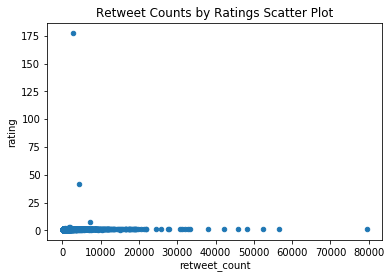

In [182]:
twitter.plot(x='retweet_count', y='rating',kind = 'scatter')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()


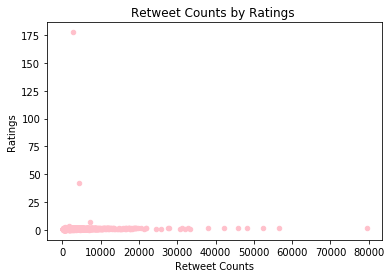

In [183]:
twitter.plot(x='retweet_count', y='rating', kind='scatter',color = 'pink')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings ')

fig = plt.gcf()


<Figure size 720x720 with 0 Axes>

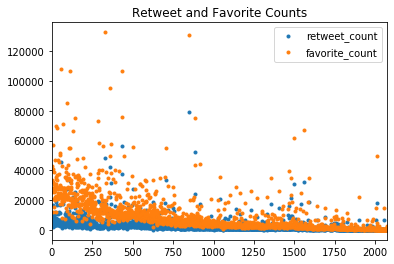

In [184]:
# plotting different realtionship between vaibles
plt.figure(figsize = (10, 10))
twitter[['retweet_count', 'favorite_count']].plot(style = '.')
plt.title('Retweet and Favorite Counts');

In [207]:
'''plt.figure(figsize=(10,10))
g = sns.boxplot(x='stage',y='retweet_count',data= twitter,palette='pink')
g.axes.set_title('BoxPlot', fontsize=15);'''

"plt.figure(figsize=(10,10))\ng = sns.boxplot(x='stage',y='retweet_count',data= twitter,palette='pink')\ng.axes.set_title('BoxPlot', fontsize=15);"

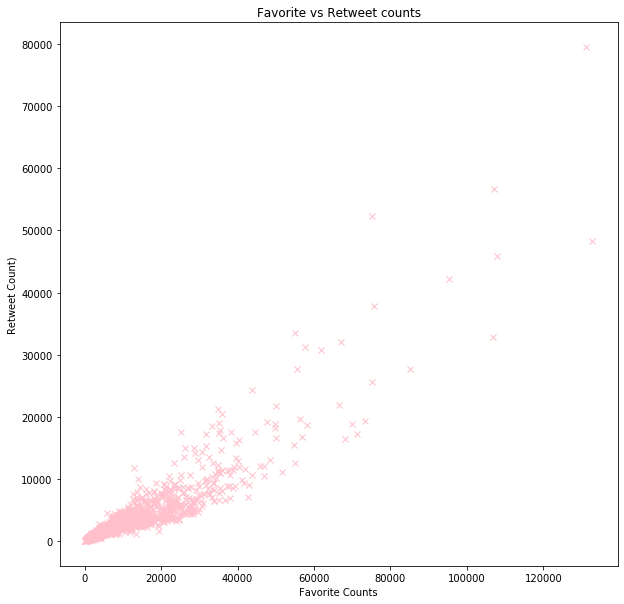

In [189]:

plt.figure(figsize = (10, 10))
plt.plot(twitter.favorite_count, twitter.retweet_count, marker='x', linestyle='', color='pink' )
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count)')
plt.show()

C:\Users\kholoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


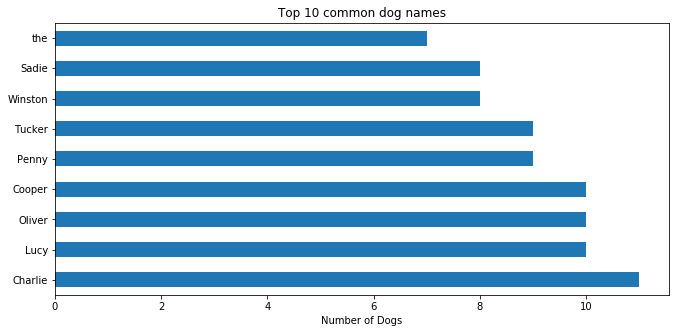

In [215]:
twitter.name.value_counts()[1:10].plot('barh', figsize=(11,5), title='Top 10 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')


C:\Users\kholoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  
C:\Users\kholoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


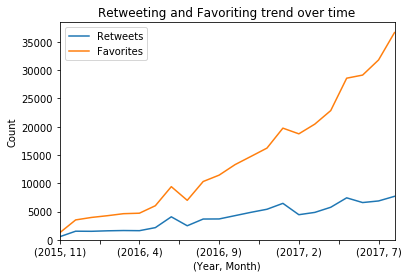

In [192]:
plt.subplots(1, sharex=True)
twitter.retweet_count.groupby([twitter["timestamp"].dt.year, twitter["timestamp"].dt.month]).mean().plot('line')
twitter.favorite_count.groupby([twitter["timestamp"].dt.year, twitter["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

C:\Users\kholoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


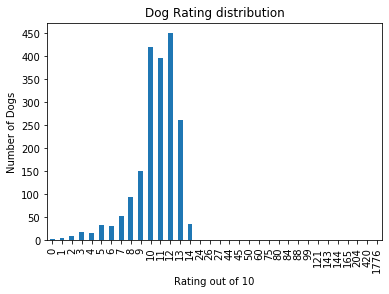

In [193]:

ax = twitter.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

C:\Users\kholoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  


(0, 385.25)

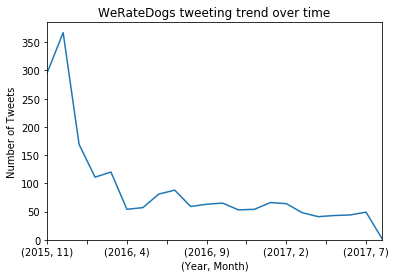

In [195]:
data = twitter.tweet_id.groupby([twitter["timestamp"].dt.year, twitter["timestamp"].dt.month]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )


## Insights

     The mean for rating is 1.055;the 3 most common ratings are 1.2,1.0,1.1, 
     
     most common name in dog names is Charlie 
     
     Among the 4 dog stages, pupper has the biggest frequency, but pupper also gets the lowest favorite counts and retweet          counts and rating.
     
